# Omdena  - Milan Chapter Agrifoods
## AI for Sustainable agri-food systems: use of Satellite Imagery
### Tabular model for grapes in Italy 2006-2019
#### Authors: Maria Fisher  and Tinsae Wondimu


The main objective of this study is to have gather information about crop production in Italy for the period of 2006-2021. 

Crop dataset used in this study was downloaded from the Italian National Institute of Statistics (Istat).



In [3]:
import warnings 
warnings.filterwarnings("ignore")

import os
import pandas as pd
pd.options.display.float_format = "{:.2f}".format
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import statsmodels.api as sm
import seaborn as sns 
import scipy 
import sklearn
import joblib
from sklearn import preprocessing


# Pre-processing data for modelling 

In [4]:
grapes= pd.read_csv("grapes_model2006-2019.csv")
grapes

City     Type_crop  total_ha  production_tonnes  RH2M  T2M_MAX  \
0     Ascoli Piceno  grapes-table     33.00             338.20 73.57    24.62   
1     Ascoli Piceno  grapes-table     33.00             338.20 73.57    24.62   
2     Ascoli Piceno  grapes-table     33.00             338.20 73.57    24.62   
3     Ascoli Piceno  grapes-table     33.00             338.20 73.57    24.62   
4     Ascoli Piceno  grapes-table     33.00             317.40 70.75    25.89   
...             ...           ...       ...                ...   ...      ...   
2200          Fermo  grapes-table      6.00              60.60 73.54    23.98   
2201          Fermo  grapes-table      6.00              60.60 72.00    24.60   
2202          Fermo  grapes-table      6.00              60.60 72.00    24.60   
2203          Fermo  grapes-table      6.00              60.60 72.00    24.60   
2204          Fermo  grapes-table      6.00              60.60 72.00    24.60   

      T2M_MIN  GWETROOT       Type_fertilizer  Fertilizers_tonnes  
0        7.27      0.65  phosphorus-potassium               12.50  
1        7.27      0.65    nitrogen-potassium               18.70  
2        7.27      0.65               organic              734.70  
3        7.27      0.65               organic              535.70  
4        8.05      0.56  phosphorus-potassium               35.00  
...       ...       ...                   ...                 ...  
2200     7.60      0.60               organic                0.00  
2201     8.33      0.62    nitrogen-potassium                1.00  
2202     8.33      0.62               organic                0.00  
2203     8.33      0.62  phosphorus-potassium                6.00  
2204     8.33      0.62               organic               30.00  

[2205 rows x 10 columns]

In [5]:
grapes.City.unique()

array(['Ascoli Piceno', 'Pescara', 'Novara', 'Firenze', 'Latina',
       'Sassari', 'Pordenone', 'Carbonia-Iglesias', 'Treviso',
       'Benevento', 'Imperia', 'Siracusa', 'Vibo Valentia', 'Vicenza',
       'Ogliastra', 'Piacenza', 'Padova', 'Olbia-Tempio', 'Trapani',
       'Lecce', 'Avellino', 'Vercelli', 'Viterbo', 'Arezzo', 'Livorno',
       'Enna', 'Cosenza', 'Genova', 'Asti', 'Caserta', 'Frosinone',
       'Macerata', 'Medio Campidano', 'Udine', 'Reggio di Calabria',
       'Catanzaro', 'Messina', 'Verona', 'Potenza', 'Campobasso',
       'Grosseto', 'Teramo', 'Verbano-Cusio-Ossola', 'Pistoia', 'Parma',
       'Ravenna', 'Oristano', 'Palermo', 'Rovigo', 'Crotone', 'Mantova',
       'Salerno', 'Biella', 'Isernia', 'Alessandria', 'Pisa', 'Lucca',
       'Perugia', 'Venezia', 'Nuoro', 'Napoli', 'Savona', 'Torino',
       'Fermo'], dtype=object)

Check for correlation

In [4]:
# Compute the correlation matrix
corr_grapes= grapes.select_dtypes(include=[np.number]).corr()

In [5]:
corr_grapes

total_ha  production_tonnes  RH2M  T2M_MAX  T2M_MIN  \
total_ha                1.00               0.92 -0.14     0.37     0.11   
production_tonnes       0.92               1.00 -0.11     0.30     0.15   
RH2M                   -0.14              -0.11  1.00    -0.37    -0.16   
T2M_MAX                 0.37               0.30 -0.37     1.00     0.25   
T2M_MIN                 0.11               0.15 -0.16     0.25     1.00   
GWETROOT                0.02               0.16  0.36    -0.45    -0.04   
Fertilizers_tonnes      0.01               0.05  0.03    -0.16    -0.06   

                    GWETROOT  Fertilizers_tonnes  
total_ha                0.02                0.01  
production_tonnes       0.16                0.05  
RH2M                    0.36                0.03  
T2M_MAX                -0.45               -0.16  
T2M_MIN                -0.04               -0.06  
GWETROOT                1.00                0.25  
Fertilizers_tonnes      0.25                1.00

<AxesSubplot: >

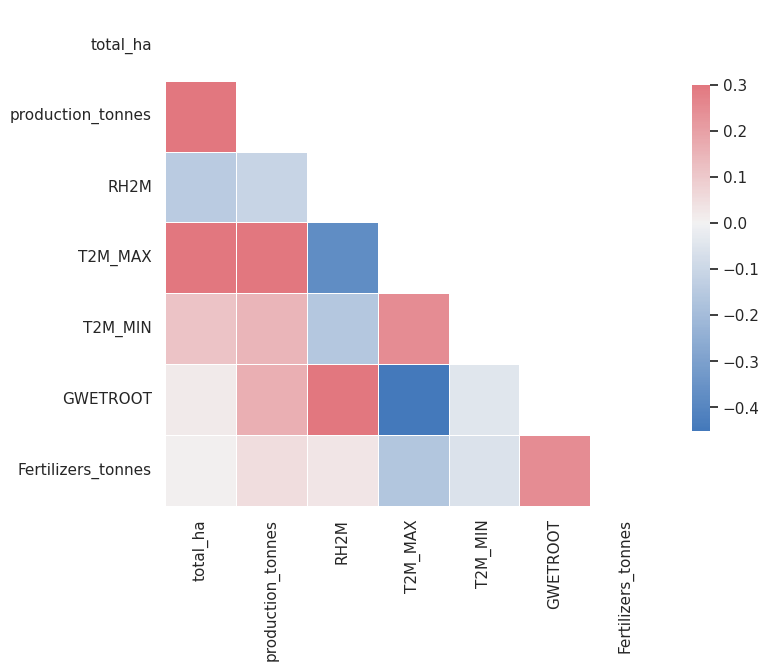

In [6]:
sns.set_theme(style="white")

# Generate a mask for the upper triangle

mask = np.zeros_like(corr_grapes, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(250, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_grapes, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})



In [7]:
# Instantiating the Scikit-Learn OHE object
sklearn_ohe = preprocessing.OneHotEncoder()
# Fitting the cat variables DataFrame to the Scikit-Learn one-hot encoder
sklearn_dummies = sklearn_ohe.fit_transform(grapes[['City','Type_crop', 'Type_fertilizer']])

In [8]:
pd.DataFrame(data = sklearn_dummies.toarray())

0    1    2    3    4    5    6    7    8    9   ...   58   59   60  \
0    0.00 0.00 1.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00  ... 0.00 0.00 0.00   
1    0.00 0.00 1.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00  ... 0.00 0.00 0.00   
2    0.00 0.00 1.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00  ... 0.00 0.00 0.00   
3    0.00 0.00 1.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00  ... 0.00 0.00 0.00   
4    0.00 0.00 1.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00  ... 0.00 0.00 0.00   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
2200 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00  ... 0.00 0.00 0.00   
2201 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00  ... 0.00 0.00 0.00   
2202 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00  ... 0.00 0.00 0.00   
2203 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00  ... 0.00 0.00 0.00   
2204 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00  ... 0.00 0.00 0.00   

       61   62   63   64   65   66   67  
0    0.00 0.00 0.00 1.00 0.00 0.00 1.00  
1    0.00 0.00 0.00 1.00 1.00 0.00 0.00  
2    0.00 0.00 0.00 1.00 0.00 1.00 0.00  
3    0.00 0.00 0.00 1.00 0.00 1.00 0.00  
4    0.00 0.00 0.00 1.00 0.00 0.00 1.00  
...   ...  ...  ...  ...  ...  ...  ...  
2200 0.00 0.00 0.00 1.00 0.00 1.00 0.00  
2201 0.00 0.00 0.00 1.00 1.00 0.00 0.00  
2202 0.00 0.00 0.00 1.00 0.00 1.00 0.00  
2203 0.00 0.00 0.00 1.00 0.00 0.00 1.00  
2204 0.00 0.00 0.00 1.00 0.00 1.00 0.00  

[2205 rows x 68 columns]

In [9]:
sklearn_dummies_df = pd.DataFrame(data = sklearn_dummies.toarray(), 
                                  columns = [c for cat in sklearn_ohe.categories_ for c in cat])

In [10]:
joblib.dump(sklearn_ohe, 'grapes_ohe.pkl')

['grapes_ohe.pkl']

In [11]:
features = pd.concat([grapes[['total_ha', 'RH2M', 'T2M_MAX', 'T2M_MIN', 'GWETROOT', 'Fertilizers_tonnes', 'production_tonnes']], sklearn_dummies_df], axis=1)

In [12]:
print(features)

      total_ha  RH2M  T2M_MAX  T2M_MIN  GWETROOT  Fertilizers_tonnes  \
0        33.00 73.57    24.62     7.27      0.65               12.50   
1        33.00 73.57    24.62     7.27      0.65               18.70   
2        33.00 73.57    24.62     7.27      0.65              734.70   
3        33.00 73.57    24.62     7.27      0.65              535.70   
4        33.00 70.75    25.89     8.05      0.56               35.00   
...        ...   ...      ...      ...       ...                 ...   
2200      6.00 73.54    23.98     7.60      0.60                0.00   
2201      6.00 72.00    24.60     8.33      0.62                1.00   
2202      6.00 72.00    24.60     8.33      0.62                0.00   
2203      6.00 72.00    24.60     8.33      0.62                6.00   
2204      6.00 72.00    24.60     8.33      0.62               30.00   

      production_tonnes  Alessandria  Arezzo  Ascoli Piceno  ...  \
0                338.20         0.00    0.00           1.00  ...   

 
## Scaling Features

In [13]:
from sklearn.preprocessing import MinMaxScaler

y = features['production_tonnes']
X = features.drop('production_tonnes', axis=1)

scaler = MinMaxScaler()
features_no_prod = pd.DataFrame(scaler.fit_transform(X), index=y.index)
features_no_prod.columns = X.columns
features_no_prod.insert(len(features_no_prod.columns), 'production_tonnes', y)

data = features_no_prod


In [14]:
data.head()


total_ha  RH2M  T2M_MAX  T2M_MIN  GWETROOT  Fertilizers_tonnes  \
0      0.07  0.57     0.42     0.57      0.59                0.01   
1      0.07  0.57     0.42     0.57      0.59                0.01   
2      0.07  0.57     0.42     0.57      0.59                0.32   
3      0.07  0.57     0.42     0.57      0.59                0.23   
4      0.07  0.36     0.54     0.62      0.32                0.02   

   Alessandria  Arezzo  Ascoli Piceno  Asti  ...  Vercelli  Verona  \
0         0.00    0.00           1.00  0.00  ...      0.00    0.00   
1         0.00    0.00           1.00  0.00  ...      0.00    0.00   
2         0.00    0.00           1.00  0.00  ...      0.00    0.00   
3         0.00    0.00           1.00  0.00  ...      0.00    0.00   
4         0.00    0.00           1.00  0.00  ...      0.00    0.00   

   Vibo Valentia  Vicenza  Viterbo  grapes-table  nitrogen-potassium  organic  \
0           0.00     0.00     0.00          0.00                0.00     0.00   
1           0.00     0.00     0.00          0.00                1.00     0.00   
2           0.00     0.00     0.00          0.00                0.00     1.00   
3           0.00     0.00     0.00          0.00                0.00     1.00   
4           0.00     0.00     0.00          0.00                0.00     0.00   

   phosphorus-potassium  production_tonnes  
0                  1.00             338.20  
1                  0.00             338.20  
2                  0.00             338.20  
3                  0.00             338.20  
4                  1.00             317.40  

[5 rows x 75 columns]

Remove 10% of data for futher tests

In [15]:
data_model = data.sample(frac=0.9, random_state=786)
data_unseen = data.drop(data_model.index)

data_model.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data_model.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))


Data for Modeling: (1984, 75)
Unseen Data For Predictions: (221, 75)


Save unseen data for futher prediction test

In [16]:
data_unseen = data_unseen.to_csv('grapes_ds_unseen.csv', index=False)

## Modelling

## Select best model

In [17]:
y = data_model['production_tonnes']
X = data_model.drop('production_tonnes', axis=1)


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Random Forest

In [19]:
# Prepare the pipeline
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
import joblib

regressor_rf = make_pipeline(RandomForestRegressor(n_estimators = 200, random_state = 0))
regressor_rf.fit(X_train, y_train)


Pipeline(steps=[('randomforestregressor',
                 RandomForestRegressor(n_estimators=200, random_state=0))])

In [20]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

# Predicting Cross Validation Score
crossval_rf = cross_val_score(estimator = regressor_rf, X = X_train, y = y_train.ravel(), cv = 10)

# Predicting R2 Score the Train set results
y_pred_rf_train = regressor_rf.predict(X_train)
r2_score_rf_train = r2_score(y_train, y_pred_rf_train)

# Predicting R2 Score the Test set results
y_pred_rf_test = regressor_rf.predict(X_test)
r2_score_rf_test = r2_score(y_test, y_pred_rf_test)

# Predicting RMSE the Test set results
rmse_rf = (np.sqrt(mean_squared_error(y_test, y_pred_rf_test)))

# Print metrics
print('CV: ', crossval_rf.mean())
print('R2_score (train): ', r2_score_rf_train)
print('R2_score (test): ', r2_score_rf_test)
print("RMSE: ", rmse_rf)

CV:  0.9916944340600751
R2_score (train):  0.9993810163713281
R2_score (test):  0.9975621373261961
RMSE:  59.30552395191319


CV:  0.9891105875775532

R2_score (train):  0.9989607952555453

R2_score (test):  0.990589516173015

RMSE:  614.6417225604372


In [21]:
print("Values before saving the model:",y_pred_rf_train)

Values before saving the model: [ 272.5525   67.283   286.6835 ...   18.6785 3495.8585  424.4605]


Save the model

In [22]:
joblib.dump(regressor_rf, 'grapes_rf.pkl')

['grapes_rf.pkl']

Load the model

In [23]:
model_rf = joblib.load('grapes_rf.pkl') 

In [24]:
print("Values after saving the model:",model_rf.predict(X_test))

Values after saving the model: [3.9534200e+02 1.7602050e+02 3.9486630e+03 1.3905000e+01 2.8829950e+02
 6.4686700e+02 4.5137500e+01 8.4968000e+01 4.4216100e+02 2.7915000e+01
 7.4085000e+01 7.4010000e+01 2.6606650e+02 9.8995000e+01 3.2172430e+03
 2.8369500e+02 1.2746100e+02 5.5664900e+02 2.5359725e+03 7.7490500e+01
 3.5537050e+02 2.9439000e+01 3.6597800e+02 8.7725500e+01 1.1503335e+03
 1.0848600e+03 1.0299050e+02 4.4435000e+01 9.5005050e+02 1.4856700e+02
 1.1699750e+02 8.7879500e+02 1.2171000e+02 7.7356000e+01 1.4520800e+02
 7.4411500e+01 6.0048000e+02 6.1407500e+03 6.9606500e+02 6.3595000e+03
 1.6250325e+03 1.4394300e+02 1.5124000e+01 5.4810750e+02 9.4127050e+02
 1.1601800e+02 6.2791100e+02 4.3495000e+01 1.9250920e+03 1.0840665e+03
 1.9218500e+02 1.6086600e+03 7.1074150e+02 3.8570950e+02 1.0277450e+02
 2.0661000e+03 5.3082450e+02 5.4436000e+01 4.3767500e+01 9.3575500e+01
 4.8878500e+01 1.3965680e+03 1.7665000e+02 1.1910450e+02 8.9468500e+01
 2.2559450e+02 4.5294500e+02 4.8825000e+02 1.8

In [25]:
result = model_rf.score(X_test, y_test)
print(result)

0.9975621373261961


Use the loaded model to make predictions with new data

In [26]:
# Predict on new dataset
pr = pd.read_csv('grapes_ds_unseen.csv')
pred_cols = list(pr.columns.values)[:-1]

# Apply the pipeline to new data
pred = pd.Series(regressor_rf.predict(pr[pred_cols]))
print (pred)

0     320.12
1     333.13
2     332.15
3     192.07
4     175.59
       ...  
216   128.99
217   101.53
218    74.70
219    72.20
220    72.24
Length: 221, dtype: float64


Residuals versus predicted values for the random forest model

In [27]:
import dalex as dx
regressor_rf = dx.Explainer(regressor_rf, X, y)

Preparation of a new explainer is initiated

  -> data              : 1984 rows 74 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 1984 values
  -> model_class       : sklearn.ensemble._forest.RandomForestRegressor (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_default at 0x7f2fe5b68720> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 4.47, mean = 6.98e+02, max = 8.25e+03
  -> model type        : regression will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -5.6e+02, mean = -0.188, max = 2.99e+02
  -> model_info        : package sklearn

A new explainer has been created!


In [28]:
md_rf = regressor_rf.model_diagnostics()
md_rf.result

total_ha  RH2M  T2M_MAX  T2M_MIN  GWETROOT  Fertilizers_tonnes  \
0         0.90  0.54     0.57     0.50      0.97                0.05   
1         0.41  0.68     0.54     0.46      0.65                0.29   
2         0.00  0.73     0.15     0.54      0.71                0.03   
3         0.36  0.44     0.77     0.42      0.35                0.00   
4         0.04  0.43     0.48     0.87      0.35                0.17   
...        ...   ...      ...      ...       ...                 ...   
1979      0.09  0.61     0.54     0.49      0.38                0.02   
1980      0.06  0.60     0.50     0.54      0.38                0.35   
1981      0.08  0.80     0.47     0.55      0.47                0.00   
1982      0.04  0.43     0.46     0.40      0.71                0.26   
1983      0.03  0.44     0.66     0.49      0.21                0.07   

      Alessandria  Arezzo  Ascoli Piceno  Asti  ...  grapes-table  \
0            0.00    0.00           0.00  0.00  ...          0.00   
1            0.00    0.00           0.00  0.00  ...          0.00   
2            0.00    0.00           0.00  0.00  ...          0.00   
3            0.00    0.00           0.00  0.00  ...          0.00   
4            0.00    0.00           0.00  0.00  ...          0.00   
...           ...     ...            ...   ...  ...           ...   
1979         0.00    0.00           0.00  0.00  ...          0.00   
1980         0.00    0.00           0.00  0.00  ...          0.00   
1981         0.00    0.00           0.00  0.00  ...          0.00   
1982         0.00    0.00           0.00  0.00  ...          0.00   
1983         0.00    0.00           0.00  0.00  ...          0.00   

      nitrogen-potassium  organic  phosphorus-potassium       y   y_hat  \
0                   1.00     0.00                  0.00 5900.00 5816.00   
1                   0.00     0.00                  1.00 2895.00 2958.29   
2                   0.00     0.00                  1.00   12.00   12.18   
3                   1.00     0.00                  0.00 1338.70 1368.71   
4                   0.00     1.00                  0.00  180.00  185.68   
...                  ...      ...                   ...     ...     ...   
1979                0.00     0.00                  1.00  337.50  349.49   
1980                0.00     1.00                  0.00  190.00  193.14   
1981                1.00     0.00                  0.00  200.00  214.36   
1982                0.00     0.00                  1.00  264.00  290.64   
1983                0.00     0.00                  1.00  116.20  118.51   

      residuals  abs_residuals                  label   ids  
0         84.00          84.00  RandomForestRegressor     1  
1        -63.29          63.29  RandomForestRegressor     2  
2         -0.18           0.18  RandomForestRegressor     3  
3        -30.01          30.01  RandomForestRegressor     4  
4         -5.68           5.68  RandomForestRegressor     5  
...         ...            ...                    ...   ...  
1979     -11.99          11.99  RandomForestRegressor  1980  
1980      -3.14           3.14  RandomForestRegressor  1981  
1981     -14.36          14.36  RandomForestRegressor  1982  
1982     -26.64          26.64  RandomForestRegressor  1983  
1983      -2.31           2.31  RandomForestRegressor  1984  

[1984 rows x 80 columns]

In [29]:
md_rf.plot()

In [30]:
md_rf = regressor_rf.model_diagnostics()
md_rf.plot(variable = "y", yvariable = "y_hat")

### Gradient Boosting

In [31]:
# Prepare the pipeline
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingRegressor
import joblib

regressor_gbr = make_pipeline(GradientBoostingRegressor(n_estimators = 200, random_state = 0))
regressor_gbr.fit(X_train, y_train)


Pipeline(steps=[('gradientboostingregressor',
                 GradientBoostingRegressor(n_estimators=200, random_state=0))])

In [32]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score


# Predicting Cross Validation Score
crossval_gbr = cross_val_score(estimator = regressor_gbr, X = X_train, y = y_train.ravel(), cv = 10)

# Predicting R2 Score the Train set results
y_pred_gbr_train = regressor_gbr.predict(X_train)
r2_score_gbr_train = r2_score(y_train, y_pred_gbr_train)

# Predicting R2 Score the Test set results
y_pred_gbr_test = regressor_gbr.predict(X_test)
r2_score_gbr_test = r2_score(y_test, y_pred_gbr_test)

# Predicting RMSE the Test set results
rmse_gbr = (np.sqrt(mean_squared_error(y_test, y_pred_gbr_test)))

# Print metrics
print('CV: ', crossval_gbr.mean())
print('R2_score (train): ', r2_score_gbr_train)
print('R2_score (test): ', r2_score_gbr_test)
print("RMSE: ", rmse_gbr)

CV:  0.9863059741084118
R2_score (train):  0.9953409429216978
R2_score (test):  0.9938643962187454
RMSE:  94.08473833715965


CV:  0.9616349702636591

R2_score (train):  0.9724990355268537

R2_score (test):  0.960273332552122

RMSE:  1262.8655856182372



In [33]:
print("Values before saving the model:",y_pred_gbr_train)

Values before saving the model: [ 260.27569158   78.84063938  354.46868532 ...   20.93416387 3537.02347427
  403.62646236]


Save the model

In [34]:
joblib.dump(regressor_gbr, 'grapes_gbr.pkl')

['grapes_gbr.pkl']

Load the model

In [35]:
model_gbr = joblib.load('grapes_gbr.pkl') 

In [36]:
print("Values after saving the model:",model_gbr.predict(X_test))

Values after saving the model: [3.43286292e+02 1.33126000e+02 3.95529995e+03 3.65772329e+01
 2.99713545e+02 6.21215418e+02 7.53348572e+01 7.26157260e+01
 3.65211649e+02 7.79819221e+01 1.02547042e+02 1.02547042e+02
 3.50997223e+02 1.28349202e+02 3.03583078e+03 3.47273650e+02
 1.49737174e+02 5.47578294e+02 2.64709450e+03 1.23983795e+02
 2.93285091e+02 5.93948036e+01 3.63264495e+02 5.90469124e+01
 1.24497826e+03 1.00440350e+03 1.06926252e+02 5.36273296e+01
 9.14938896e+02 1.40306625e+02 1.25588051e+02 8.14553888e+02
 9.29186734e+01 1.28399380e+02 1.25911988e+02 1.45111730e+02
 5.94442472e+02 5.98941840e+03 6.38648859e+02 6.11688588e+03
 1.54649749e+03 1.38396802e+02 2.20851962e+01 6.00214538e+02
 9.03612625e+02 1.05437242e+02 5.99943702e+02 1.27973701e+02
 1.86996812e+03 1.00440350e+03 1.45111730e+02 1.67337006e+03
 7.10659247e+02 3.48049820e+02 1.42696728e+02 2.00347867e+03
 5.98675380e+02 6.85077628e+01 4.81344850e+01 1.28223630e+02
 5.72548776e+01 1.34722301e+03 1.84809149e+02 1.458410

In [37]:
result = model_gbr.score(X_test, y_test)
print(result)

0.9938643962187454


Use the loaded model to make predictions with new data

In [38]:
# Predict on new dataset
pr = pd.read_csv('grapes_ds_unseen.csv')
pred_cols = list(pr.columns.values)[:-1]

# Apply the pipeline to new data
pred = pd.Series(regressor_gbr.predict(pr[pred_cols]))
print (pred)

0     405.00
1     352.98
2     352.98
3     150.27
4     148.82
       ...  
216   106.43
217   106.09
218    91.02
219    91.02
220    91.02
Length: 221, dtype: float64


In [39]:
import dalex as dx
regressor_gbr = dx.Explainer(regressor_gbr, X, y)

Preparation of a new explainer is initiated

  -> data              : 1984 rows 74 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 1984 values
  -> model_class       : sklearn.ensemble._gb.GradientBoostingRegressor (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_default at 0x7f2fe5b68720> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.957, mean = 6.98e+02, max = 8.19e+03
  -> model type        : regression will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -6.17e+02, mean = -0.459, max = 4.95e+02
  -> model_info        : package sklearn

A new explainer has been created!


In [40]:
md_gbr = regressor_gbr.model_diagnostics()
md_gbr.result

total_ha  RH2M  T2M_MAX  T2M_MIN  GWETROOT  Fertilizers_tonnes  \
0         0.90  0.54     0.57     0.50      0.97                0.05   
1         0.41  0.68     0.54     0.46      0.65                0.29   
2         0.00  0.73     0.15     0.54      0.71                0.03   
3         0.36  0.44     0.77     0.42      0.35                0.00   
4         0.04  0.43     0.48     0.87      0.35                0.17   
...        ...   ...      ...      ...       ...                 ...   
1979      0.09  0.61     0.54     0.49      0.38                0.02   
1980      0.06  0.60     0.50     0.54      0.38                0.35   
1981      0.08  0.80     0.47     0.55      0.47                0.00   
1982      0.04  0.43     0.46     0.40      0.71                0.26   
1983      0.03  0.44     0.66     0.49      0.21                0.07   

      Alessandria  Arezzo  Ascoli Piceno  Asti  ...  grapes-table  \
0            0.00    0.00           0.00  0.00  ...          0.00   
1            0.00    0.00           0.00  0.00  ...          0.00   
2            0.00    0.00           0.00  0.00  ...          0.00   
3            0.00    0.00           0.00  0.00  ...          0.00   
4            0.00    0.00           0.00  0.00  ...          0.00   
...           ...     ...            ...   ...  ...           ...   
1979         0.00    0.00           0.00  0.00  ...          0.00   
1980         0.00    0.00           0.00  0.00  ...          0.00   
1981         0.00    0.00           0.00  0.00  ...          0.00   
1982         0.00    0.00           0.00  0.00  ...          0.00   
1983         0.00    0.00           0.00  0.00  ...          0.00   

      nitrogen-potassium  organic  phosphorus-potassium       y   y_hat  \
0                   1.00     0.00                  0.00 5900.00 5743.51   
1                   0.00     0.00                  1.00 2895.00 3210.71   
2                   0.00     0.00                  1.00   12.00   32.68   
3                   1.00     0.00                  0.00 1338.70 1342.50   
4                   0.00     1.00                  0.00  180.00  236.77   
...                  ...      ...                   ...     ...     ...   
1979                0.00     0.00                  1.00  337.50  359.13   
1980                0.00     1.00                  0.00  190.00  219.33   
1981                1.00     0.00                  0.00  200.00  247.47   
1982                0.00     0.00                  1.00  264.00  317.40   
1983                0.00     0.00                  1.00  116.20  150.60   

      residuals  abs_residuals                      label   ids  
0        156.49         156.49  GradientBoostingRegressor     1  
1       -315.71         315.71  GradientBoostingRegressor     2  
2        -20.68          20.68  GradientBoostingRegressor     3  
3         -3.80           3.80  GradientBoostingRegressor     4  
4        -56.77          56.77  GradientBoostingRegressor     5  
...         ...            ...                        ...   ...  
1979     -21.63          21.63  GradientBoostingRegressor  1980  
1980     -29.33          29.33  GradientBoostingRegressor  1981  
1981     -47.47          47.47  GradientBoostingRegressor  1982  
1982     -53.40          53.40  GradientBoostingRegressor  1983  
1983     -34.40          34.40  GradientBoostingRegressor  1984  

[1984 rows x 80 columns]

In [41]:
md_gbr.plot()

In [42]:
md_gbr = regressor_gbr.model_diagnostics()
md_gbr.plot(variable = "y", yvariable = "y_hat")

### Decision Tree

In [43]:
# Prepare the pipeline
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
import joblib

regressor_dt = make_pipeline( DecisionTreeRegressor())
regressor_dt.fit(X_train, y_train)

Pipeline(steps=[('decisiontreeregressor', DecisionTreeRegressor())])

In [44]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

# Predicting Cross Validation Score

# Predicting Cross Validation Score
crossval_dt = cross_val_score(estimator = regressor_dt, X = X_train, y = y_train.ravel(), cv = 10)

# Predicting R2 Score the Train set results
y_pred_dt_train = regressor_dt.predict(X_train)
r2_score_dt_train = r2_score(y_train, y_pred_dt_train)

# Predicting R2 Score the Test set results
y_pred_dt_test = regressor_dt.predict(X_test)
r2_score_dt_test = r2_score(y_test, y_pred_dt_test)

# Predicting RMSE the Test set results
rmse_dt = (np.sqrt(mean_squared_error(y_test, y_pred_dt_test)))

# Print metrics
print('CV: ', crossval_dt.mean())
print('R2_score (train): ', r2_score_dt_train)
print('R2_score (test): ', r2_score_dt_test)
print("RMSE: ", rmse_dt)

CV:  0.9919787516774946
R2_score (train):  1.0
R2_score (test):  0.9987475324473556
RMSE:  42.50830323394143


CV:  0.9862913572428879

R2_score (train):  1.0

R2_score (test):  0.9900320150787043

RMSE:  632.5862490926847



In [45]:
print("Values before saving the model:",y_pred_dt_train)

Values before saving the model: [ 273.6   60.   278.8 ...   19.  3492.3  395.5]


Save the model

In [46]:
joblib.dump(regressor_dt, 'grapes_dt.pkl')

['grapes_dt.pkl']

Load the model

In [47]:
model_dt = joblib.load('grapes_dt.pkl') 

In [48]:
print("Values after saving the model:",model_dt.predict(X_test))

Values after saving the model: [4.0000e+02 1.7790e+02 4.2420e+03 1.4000e+01 2.6800e+02 6.4000e+02
 4.5000e+01 8.5000e+01 4.5000e+02 2.8400e+01 7.1000e+01 7.1000e+01
 2.4750e+02 9.0000e+01 3.1100e+03 3.8250e+02 1.2770e+02 5.5850e+02
 2.5105e+03 7.3700e+01 2.6400e+02 2.9400e+01 3.8250e+02 8.6000e+01
 1.1423e+03 1.1200e+03 1.0050e+02 4.4000e+01 9.5530e+02 1.2000e+02
 1.0410e+02 8.7950e+02 9.8000e+01 7.5000e+01 1.5600e+02 4.0000e+01
 5.9500e+02 6.1000e+03 7.5000e+02 5.8000e+03 1.6296e+03 1.1000e+02
 1.5000e+01 6.0000e+02 9.4200e+02 1.1880e+02 6.4000e+02 4.5000e+01
 1.9700e+03 1.1200e+03 1.9500e+02 1.6110e+03 7.3950e+02 4.0000e+02
 1.0000e+02 2.1250e+03 4.8000e+02 5.4000e+01 4.5000e+01 8.8800e+01
 4.7500e+01 1.3961e+03 1.8000e+02 1.1620e+02 7.1500e+01 2.3200e+01
 4.4620e+02 5.0000e+02 1.8800e+02 6.0900e+02 6.0000e+02 4.8000e+02
 8.8800e+01 1.1000e+02 2.8950e+03 1.1620e+02 2.6300e+02 3.0552e+03
 1.8000e+01 2.5000e+03 4.5000e+02 3.6000e+01 1.8700e+02 9.9000e+01
 1.2920e+02 1.1620e+02 4.8000e+

In [49]:
result = model_dt.score(X_test, y_test)
print(result)

0.9987475324473556


Use the loaded model to make predictions with new data

In [50]:
# Predict on new dataset
pr = pd.read_csv('grapes_ds_unseen.csv')
pred_cols = list(pr.columns.values)[:-1]

# Apply the pipeline to new data
pred = pd.Series(regressor_dt.predict(pr[pred_cols]))
print (pred)

0     317.40
1     336.00
2     336.00
3     210.00
4     210.00
       ...  
216   131.30
217    98.00
218    74.00
219    71.00
220    71.00
Length: 221, dtype: float64


In [51]:
import dalex as dx
regressor_dt = dx.Explainer(regressor_dt, X, y)

Preparation of a new explainer is initiated

  -> data              : 1984 rows 74 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 1984 values
  -> model_class       : sklearn.tree._classes.DecisionTreeRegressor (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_default at 0x7f2fe5b68720> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 4.0, mean = 6.98e+02, max = 8.4e+03
  -> model type        : regression will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -6.44e+02, mean = -0.614, max = 82.0
  -> model_info        : package sklearn

A new explainer has been created!


In [52]:
md_dt = regressor_dt.model_diagnostics()
md_dt.result

total_ha  RH2M  T2M_MAX  T2M_MIN  GWETROOT  Fertilizers_tonnes  \
0         0.90  0.54     0.57     0.50      0.97                0.05   
1         0.41  0.68     0.54     0.46      0.65                0.29   
2         0.00  0.73     0.15     0.54      0.71                0.03   
3         0.36  0.44     0.77     0.42      0.35                0.00   
4         0.04  0.43     0.48     0.87      0.35                0.17   
...        ...   ...      ...      ...       ...                 ...   
1979      0.09  0.61     0.54     0.49      0.38                0.02   
1980      0.06  0.60     0.50     0.54      0.38                0.35   
1981      0.08  0.80     0.47     0.55      0.47                0.00   
1982      0.04  0.43     0.46     0.40      0.71                0.26   
1983      0.03  0.44     0.66     0.49      0.21                0.07   

      Alessandria  Arezzo  Ascoli Piceno  Asti  ...  grapes-table  \
0            0.00    0.00           0.00  0.00  ...          0.00   
1            0.00    0.00           0.00  0.00  ...          0.00   
2            0.00    0.00           0.00  0.00  ...          0.00   
3            0.00    0.00           0.00  0.00  ...          0.00   
4            0.00    0.00           0.00  0.00  ...          0.00   
...           ...     ...            ...   ...  ...           ...   
1979         0.00    0.00           0.00  0.00  ...          0.00   
1980         0.00    0.00           0.00  0.00  ...          0.00   
1981         0.00    0.00           0.00  0.00  ...          0.00   
1982         0.00    0.00           0.00  0.00  ...          0.00   
1983         0.00    0.00           0.00  0.00  ...          0.00   

      nitrogen-potassium  organic  phosphorus-potassium       y   y_hat  \
0                   1.00     0.00                  0.00 5900.00 5900.00   
1                   0.00     0.00                  1.00 2895.00 2895.00   
2                   0.00     0.00                  1.00   12.00   12.00   
3                   1.00     0.00                  0.00 1338.70 1338.70   
4                   0.00     1.00                  0.00  180.00  180.00   
...                  ...      ...                   ...     ...     ...   
1979                0.00     0.00                  1.00  337.50  337.50   
1980                0.00     1.00                  0.00  190.00  190.00   
1981                1.00     0.00                  0.00  200.00  200.00   
1982                0.00     0.00                  1.00  264.00  264.00   
1983                0.00     0.00                  1.00  116.20  116.20   

      residuals  abs_residuals                  label   ids  
0          0.00           0.00  DecisionTreeRegressor     1  
1          0.00           0.00  DecisionTreeRegressor     2  
2          0.00           0.00  DecisionTreeRegressor     3  
3          0.00           0.00  DecisionTreeRegressor     4  
4          0.00           0.00  DecisionTreeRegressor     5  
...         ...            ...                    ...   ...  
1979       0.00           0.00  DecisionTreeRegressor  1980  
1980       0.00           0.00  DecisionTreeRegressor  1981  
1981       0.00           0.00  DecisionTreeRegressor  1982  
1982       0.00           0.00  DecisionTreeRegressor  1983  
1983      -0.00           0.00  DecisionTreeRegressor  1984  

[1984 rows x 80 columns]

In [53]:
md_dt.plot()

In [54]:
md_dt = regressor_dt.model_diagnostics()
md_dt.plot(variable = "y", yvariable = "y_hat")

### K Neighbors 

In [55]:
# Prepare the pipeline
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsRegressor
import joblib

regressor_knn = make_pipeline(  KNeighborsRegressor(n_neighbors=5))
regressor_knn.fit(X_train, y_train)

Pipeline(steps=[('kneighborsregressor', KNeighborsRegressor())])

In [56]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

# Predicting Cross Validation Score
crossval_knn = cross_val_score(estimator = regressor_knn, X = X_train, y = y_train.ravel(), cv = 10)

# Predicting R2 Score the Train set results
y_pred_knn_train = regressor_knn.predict(X_train)
r2_score_knn_train = r2_score(y_train, y_pred_knn_train)

# Predicting R2 Score the Test set results
y_pred_knn_test = regressor_knn.predict(X_test)
r2_score_knn_test = r2_score(y_test, y_pred_knn_test)

# Predicting RMSE the Test set results
rmse_knn = (np.sqrt(mean_squared_error(y_test, y_pred_knn_test)))

# Print metrics
print('CV: ', crossval_knn.mean())
print('R2_score (train): ', r2_score_knn_train)
print('R2_score (test): ', r2_score_knn_test)
print("RMSE: ", rmse_knn)

CV:  0.9121050039582732
R2_score (train):  0.9484145421451732
R2_score (test):  0.9381991868080497
RMSE:  298.59850090644596


CV:  0.9070828384183001

R2_score (train):  0.9524512553705786

R2_score (test):  0.9202745373800134

RMSE:  1789.0174841968817



In [57]:
print("Values before saving the model:",y_pred_knn_train)

Values before saving the model: [ 391.34   94.84  602.52 ...   20.52 3315.72  432.08]


Save the model

In [58]:
joblib.dump(regressor_knn, 'grapes_knn.pkl')

['grapes_knn.pkl']

Load the model

In [59]:
model_knn = joblib.load('grapes_knn.pkl') 

In [60]:
print("Values after saving the model:",model_knn.predict(X_test))

Values after saving the model: [ 338.    118.78 3040.16  145.    268.06  494.94   54.1   378.4   119.8
   96.9    65.54   64.64  267.56  121.   3072.88  153.3   134.46  357.04
 3113.    462.06  388.8    29.38  212.08  226.5  1297.12  773.6   208.98
   56.6   836.7   204.46  216.78  824.    342.04  268.06  132.5   156.5
  553.   6310.    637.5  6530.    878.58  535.9    15.36  759.9   952.34
  138.76  627.2   196.8  1335.2   847.6   102.1  1347.2   664.34  174.
  111.   2376.    526.04   52.4    73.4    83.62   52.4  1339.24   76.4
  122.3    95.14  252.62  503.92  260.    244.5   646.66  635.    643.76
   98.26  145.   2707.5   118.1   487.4  2559.5    25.2  3271.74  119.8
   60.    157.46  166.7   106.06  134.46   12.    543.06  885.6   163.3
  265.78  434.4   658.06  952.76  302.42  347.98 2873.    370.48  298.
  478.82  265.78  188.8   208.3  1300.8  1035.26  194.84  153.6    21.8
 6122.    246.6   100.    473.6   107.44  264.84  229.58  224.6    76.4
 2951.78   17.92  346.16   19.5

In [61]:
result = model_knn.score(X_test, y_test)
print(result)

0.9381991868080497


Use the loaded model to make predictions with new data

In [62]:
# Predict on new dataset
pr = pd.read_csv('grapes_ds_unseen.csv')
pred_cols = list(pr.columns.values)[:-1]

# Apply the pipeline to new data
pred = pd.Series(regressor_knn.predict(pr[pred_cols]))
print (pred)

0     215.02
1     195.98
2     159.58
3     216.78
4     243.92
       ...  
216    81.82
217   115.44
218    64.64
219    67.44
220    65.54
Length: 221, dtype: float64


In [63]:
import dalex as dx
regressor_knn = dx.Explainer(regressor_knn, X, y)

Preparation of a new explainer is initiated

  -> data              : 1984 rows 74 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 1984 values
  -> model_class       : sklearn.neighbors._regression.KNeighborsRegressor (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_default at 0x7f2fe5b68720> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 7.92, mean = 7.05e+02, max = 6.88e+03
  -> model type        : regression will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -2.5e+03, mean = -7.07, max = 2.28e+03
  -> model_info        : package sklearn

A new explainer has been created!


In [64]:
md_knn = regressor_knn.model_diagnostics()
md_knn.result

total_ha  RH2M  T2M_MAX  T2M_MIN  GWETROOT  Fertilizers_tonnes  \
0         0.90  0.54     0.57     0.50      0.97                0.05   
1         0.41  0.68     0.54     0.46      0.65                0.29   
2         0.00  0.73     0.15     0.54      0.71                0.03   
3         0.36  0.44     0.77     0.42      0.35                0.00   
4         0.04  0.43     0.48     0.87      0.35                0.17   
...        ...   ...      ...      ...       ...                 ...   
1979      0.09  0.61     0.54     0.49      0.38                0.02   
1980      0.06  0.60     0.50     0.54      0.38                0.35   
1981      0.08  0.80     0.47     0.55      0.47                0.00   
1982      0.04  0.43     0.46     0.40      0.71                0.26   
1983      0.03  0.44     0.66     0.49      0.21                0.07   

      Alessandria  Arezzo  Ascoli Piceno  Asti  ...  grapes-table  \
0            0.00    0.00           0.00  0.00  ...          0.00   
1            0.00    0.00           0.00  0.00  ...          0.00   
2            0.00    0.00           0.00  0.00  ...          0.00   
3            0.00    0.00           0.00  0.00  ...          0.00   
4            0.00    0.00           0.00  0.00  ...          0.00   
...           ...     ...            ...   ...  ...           ...   
1979         0.00    0.00           0.00  0.00  ...          0.00   
1980         0.00    0.00           0.00  0.00  ...          0.00   
1981         0.00    0.00           0.00  0.00  ...          0.00   
1982         0.00    0.00           0.00  0.00  ...          0.00   
1983         0.00    0.00           0.00  0.00  ...          0.00   

      nitrogen-potassium  organic  phosphorus-potassium       y   y_hat  \
0                   1.00     0.00                  0.00 5900.00 5540.00   
1                   0.00     0.00                  1.00 2895.00 3453.00   
2                   0.00     0.00                  1.00   12.00   18.36   
3                   1.00     0.00                  0.00 1338.70 1378.52   
4                   0.00     1.00                  0.00  180.00  306.00   
...                  ...      ...                   ...     ...     ...   
1979                0.00     0.00                  1.00  337.50  254.60   
1980                0.00     1.00                  0.00  190.00  220.60   
1981                1.00     0.00                  0.00  200.00  253.50   
1982                0.00     0.00                  1.00  264.00  174.40   
1983                0.00     0.00                  1.00  116.20  118.10   

      residuals  abs_residuals                label   ids  
0        360.00         360.00  KNeighborsRegressor     1  
1       -558.00         558.00  KNeighborsRegressor     2  
2         -6.36           6.36  KNeighborsRegressor     3  
3        -39.82          39.82  KNeighborsRegressor     4  
4       -126.00         126.00  KNeighborsRegressor     5  
...         ...            ...                  ...   ...  
1979      82.90          82.90  KNeighborsRegressor  1980  
1980     -30.60          30.60  KNeighborsRegressor  1981  
1981     -53.50          53.50  KNeighborsRegressor  1982  
1982      89.60          89.60  KNeighborsRegressor  1983  
1983      -1.90           1.90  KNeighborsRegressor  1984  

[1984 rows x 80 columns]

In [65]:
md_knn.plot()

In [66]:
md_knn = regressor_knn.model_diagnostics()
md_knn.plot(variable = "y", yvariable = "y_hat")

# Evaluate models 

In [67]:
models = [('Gradient Boosting Regressor', rmse_gbr, r2_score_gbr_train,r2_score_gbr_test, crossval_gbr.mean()),
          ('Random Forest Regressor', rmse_rf, r2_score_rf_train,r2_score_rf_test,crossval_rf.mean()),
          ('K Neighbors Regressor', rmse_knn, r2_score_knn_train,r2_score_knn_test,crossval_knn.mean()),
          ('Decision Tree Regressor', rmse_dt, r2_score_dt_train,r2_score_dt_test, crossval_dt.mean()) 
         ]

In [68]:
predict = pd.DataFrame(data = models, columns=['Model', 'RMSE', 'R² Score(training)', 'R² Score(test)', 'Cross-Validation'])
predict

Model   RMSE  R² Score(training)  R² Score(test)  \
0  Gradient Boosting Regressor  94.08                1.00            0.99   
1      Random Forest Regressor  59.31                1.00            1.00   
2        K Neighbors Regressor 298.60                0.95            0.94   
3      Decision Tree Regressor  42.51                1.00            1.00   

   Cross-Validation  
0              0.99  
1              0.99  
2              0.91  
3              0.99

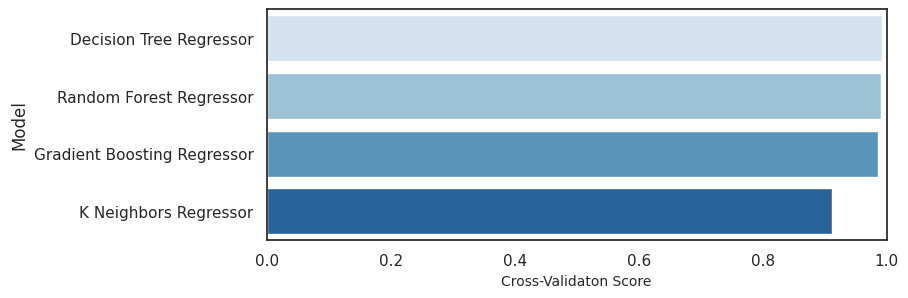

In [69]:
f, axe = plt.subplots(1,1, figsize=(8,3))

predict.sort_values(by=['Cross-Validation'], ascending=False, inplace=True)

sns.barplot(x='Cross-Validation', y='Model', data = predict, palette='Blues',ax = axe)
#axes[0].set(xlabel='Region', ylabel='Charges')
axe.set_xlabel('Cross-Validaton Score', size=10)
axe.set_ylabel('Model')
axe.set_xlim(0,1.0)
plt.show()

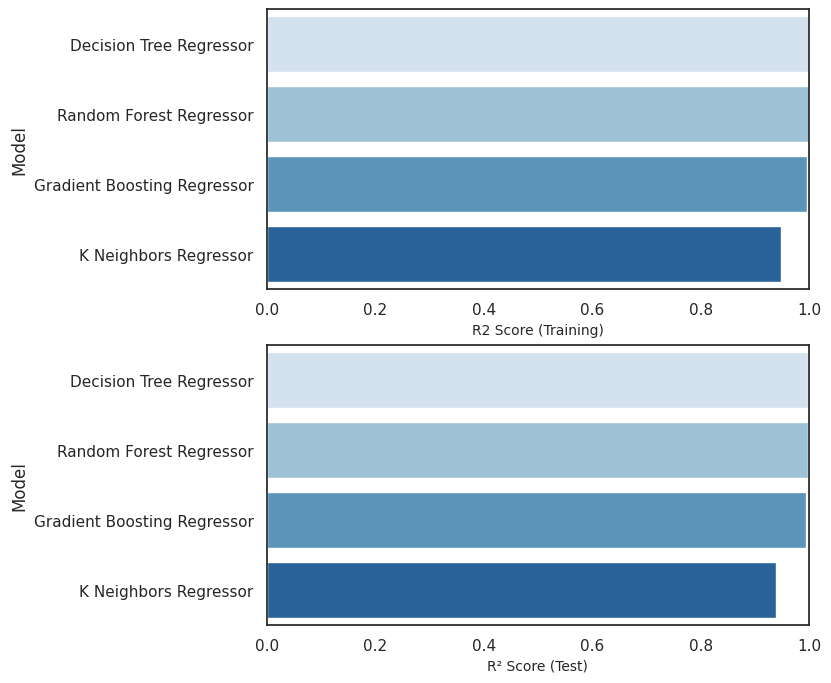

In [70]:
f, axes = plt.subplots(2,1, figsize=(7,8))

predict.sort_values(by=['R² Score(training)'], ascending=False, inplace=True)

sns.barplot(x='R² Score(training)', y='Model', data = predict, palette='Blues', ax = axes[0])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[0].set_xlabel('R2 Score (Training)', size=10)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)

predict.sort_values(by=['R² Score(test)'], ascending=False, inplace=True)

sns.barplot(x='R² Score(test)', y='Model', data = predict, palette='Blues', ax = axes[1])
axes[1].set_xlabel('R² Score (Test)', size=10)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)

plt.show()

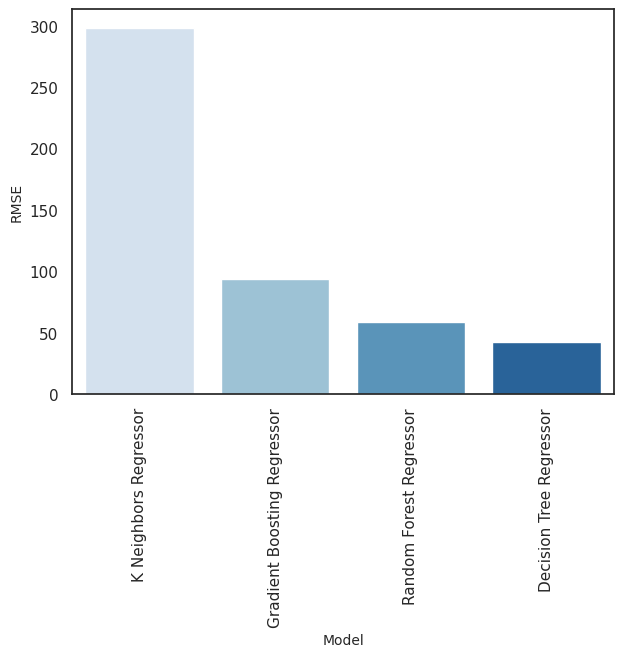

In [72]:
predict.sort_values(by=['RMSE'], ascending=False, inplace=True)

f, axe = plt.subplots( figsize=(7,5))
sns.barplot(x='Model', y='RMSE', data=predict, palette='Blues',ax = axe)
axe.set_xlabel('Model', size=10)
axe.set_ylabel('RMSE', size=10)
plt.xticks(rotation= 90)
plt.show()

The models Random Forest Regressor and Decision Tree have better performance. 

# References


http://dati.istat.it

https://maps.princeton.edu/catalog/stanford-mn871sp9778

https://www.crea.gov.it/documents/68457/0/ITACONTA+2020_ENG+DEF+xweb+%281%29.pdf/95c6b30a-1e18-8e94-d4ac-ce884aef76e8?t=1619527317576

https://seaborn.pydata.org/generated/seaborn.relplot.html

https://www.statisticshowto.com/variance-inflation-factor/

https://statisticsbyjim.com/regression/multicollinearity-in-regression-analysis/

https://lost-stats.github.io/Presentation/Figures/heatmap_colored_correlation_matrix.html

https://plotly.com/python/box-plots/

https://numpy.org/doc/stable/reference/generated/numpy.zeros_like.html